# Homework 1

We will use Preliz to compute the four moments of the SkewNormal and t distributions as welll as from randomly generated samples.
Lastly we will do the coin flip example with different priors and amounts of data.

## Discussion of results

Once you are done with the homework, please add a section at the top where you say what you actually found.

## Setup

This section is for imports and such

In [1]:
%matplotlib inline
import arviz as az
import matplotlib.pyplot as plt
import pymc as pm
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from google.colab import files

In [2]:
az.style.use("arviz-darkgrid")
sns.set_style("darkgrid")

## 1. Question 1



In [3]:
#preliz
!pip install preliz

import preliz as pz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 8.1 MB/s eta 0:00:00


a. Computing moments of the SkewNormal distribution using Preliz

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

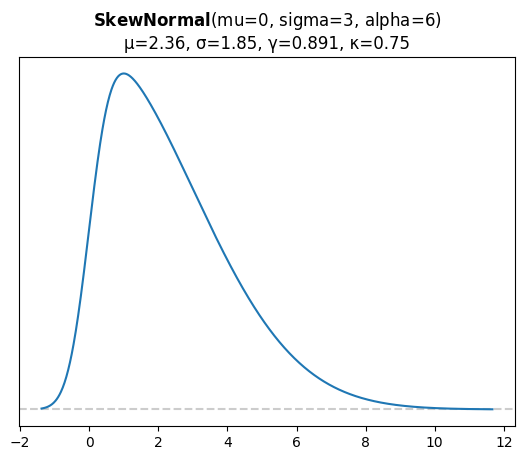

In [ ]:
pz.SkewNormal(0, 3, 6).plot_pdf(moments=["m", "d", "s", "k"], legend="title")

plt.savefig("moments.png", bbox_inches='tight')
files.download("moments.png")

b. Computing first two moments from randomly generated samples of different sizes.

In [ ]:
s10 = pz.SkewNormal(0, 3, 6).rvs(10)
s100 = pz.SkewNormal(0, 3, 6).rvs(100)
s1000 = pz.SkewNormal(0, 3, 6).rvs(1000)

m10 = np.mean(s10)
m100 = np.mean(s100)
m1000 = np.mean(s1000)

s10 = np.std(s10, ddof = 1)
s100 = np.std(s100, ddof = 1)
s1000 = np.std(s1000, ddof = 1)

print(f'Sample size 10: mean = {round(m10, 2)}, sigma = {round(s10, 2)}')
print(f'Sample size 100: mean = {round(m100, 2)}, sigma = {round(s100, 2)}')
print(f'Sample size 1000: mean = {round(m1000, 2)}, sigma = {round(s1000, 2)}')


Sample size 10: mean = 2.24, sigma = 1.98
Sample size 100: mean = 2.19, sigma = 1.78
Sample size 1000: mean = 2.4, sigma = 1.9


c. Repeating for t distribution

<Axes: title={'center': '$\\bf{StudentT}$(nu=500, mu=0, sigma=1)\nμ=0, σ=1, γ=0, κ=0.0121'}>

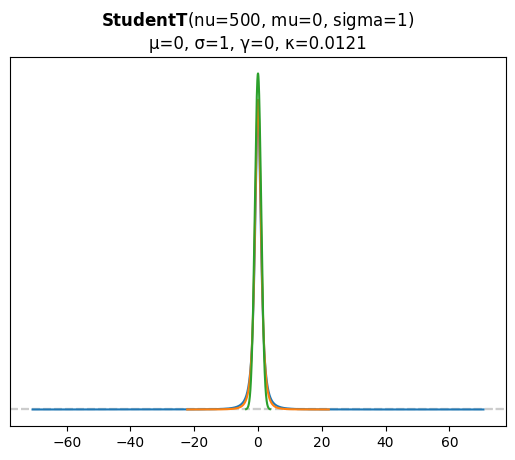

In [ ]:
pz.StudentT(2, 0, 1).plot_pdf(moments=["m", "d", "s", "k"], legend="title")
pz.StudentT(3, 0, 1).plot_pdf(moments=["m", "d", "s", "k"], legend="title")
pz.StudentT(500, 0, 1).plot_pdf(moments=["m", "d", "s", "k"], legend="title")


In [ ]:
#nu=2
s10 = pz.StudentT(2, 0, 1).rvs(10)
s100 = pz.StudentT(2, 0, 1).rvs(100)
s1000 = pz.StudentT(2, 0, 1).rvs(1000)

m10 = np.mean(s10)
m100 = np.mean(s100)
m1000 = np.mean(s1000)

s10 = np.std(s10, ddof = 1)
s100 = np.std(s100, ddof = 1)
s1000 = np.std(s1000, ddof = 1)

print(f'Sample size 10: mean = {round(m10, 2)}, sigma = {round(s10, 2)}')
print(f'Sample size 100: mean = {round(m100, 2)}, sigma = {round(s100, 2)}')
print(f'Sample size 1000: mean = {round(m1000, 2)}, sigma = {round(s1000, 2)}')

Sample size 10: mean = 0.69, sigma = 2.18
Sample size 100: mean = -0.4, sigma = 2.2
Sample size 1000: mean = 0.03, sigma = 2.61


In [ ]:
#nu=3
s10 = pz.StudentT(3, 0, 1).rvs(10)
s100 = pz.StudentT(3, 0, 1).rvs(100)
s1000 = pz.StudentT(3, 0, 1).rvs(1000)

m10 = np.mean(s10)
m100 = np.mean(s100)
m1000 = np.mean(s1000)

s10 = np.std(s10, ddof = 1)
s100 = np.std(s100, ddof = 1)
s1000 = np.std(s1000, ddof = 1)

print(f'Sample size 10: mean = {round(m10, 2)}, sigma = {round(s10, 2)}')
print(f'Sample size 100: mean = {round(m100, 2)}, sigma = {round(s100, 2)}')
print(f'Sample size 1000: mean = {round(m1000, 2)}, sigma = {round(s1000, 2)}')

Sample size 10: mean = 0.1, sigma = 1.84
Sample size 100: mean = -0.17, sigma = 1.83
Sample size 1000: mean = -0.04, sigma = 1.84


In [ ]:
#nu=500
s10 = pz.StudentT(500, 0, 1).rvs(10)
s100 = pz.StudentT(500, 0, 1).rvs(100)
s1000 = pz.StudentT(500, 0, 1).rvs(1000)

m10 = np.mean(s10)
m100 = np.mean(s100)
m1000 = np.mean(s1000)

s10 = np.std(s10, ddof = 1)
s100 = np.std(s100, ddof = 1)
s1000 = np.std(s1000, ddof = 1)

print(f'Sample size 10: mean = {round(m10, 2)}, sigma = {round(s10, 2)}')
print(f'Sample size 100: mean = {round(m100, 2)}, sigma = {round(s100, 2)}')
print(f'Sample size 1000: mean = {round(m1000, 2)}, sigma = {round(s1000, 2)}')

Sample size 10: mean = -0.14, sigma = 1.03
Sample size 100: mean = 0.06, sigma = 1.1
Sample size 1000: mean = 0.01, sigma = 0.99


## 2. Question 4

a. Beta prior for case of no prior inclination about coin bias.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

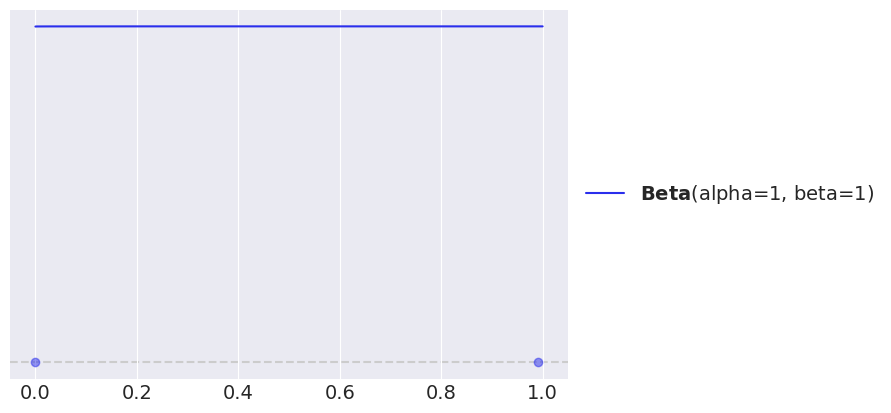

In [8]:
dist = pz.Beta()
pz.maxent(dist, 0, 0.99, 0.99)

plt.savefig("priora.png", bbox_inches='tight')
files.download("priora.png")

b. Beta prior for the case where we think the coin may be fair.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

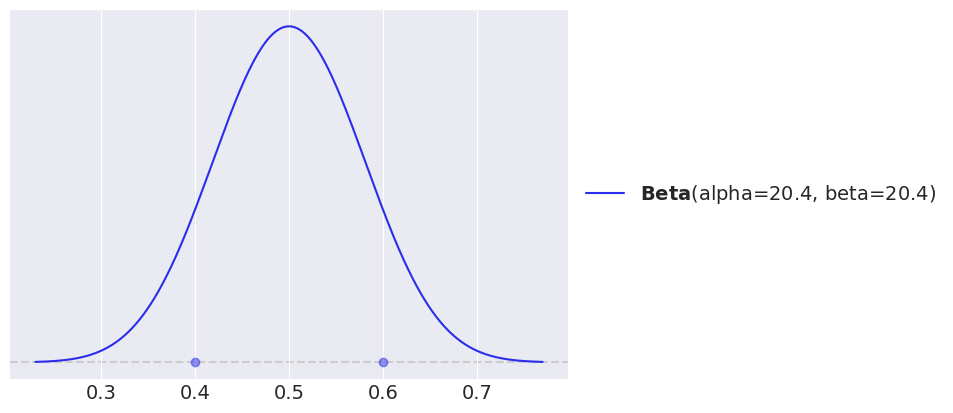

In [13]:
dist = pz.Beta()
pz.maxent(dist, 0.4, 0.6, 0.8)

plt.savefig("priorb.png", bbox_inches='tight')
files.download("priorb.png")

c. 5 repitions of coin flip with two heads.

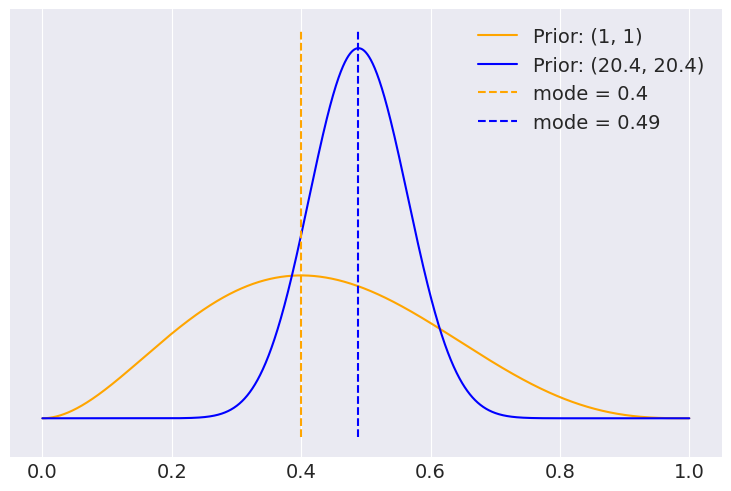

In [29]:
beta_params = [(1, 1), (20.4, 20.4)]
x = np.linspace(0, 1, 2000)

N = 5
y = 2

m = []
colors = ('orange', 'blue')
for i, (alpha_prior, beta_prior) in enumerate(beta_params):
  posterior = pz.Beta(alpha_prior + y, beta_prior + N - y).pdf(x)
  plt.plot(x, posterior, color = colors[i], label = f'Prior: ({alpha_prior}, {beta_prior})')
  m.append(pz.Beta(alpha_prior + y, beta_prior + N - y).mode())


plt.yticks([])


ylim = plt.gca().get_ylim()
for i in range(len(m)):
  plt.plot([m[i], m[i]], ylim, color = colors[i], linestyle = 'dashed', label = f'mode = {np.round(m[i], 2)}')

plt.legend(loc = 'upper right')

plt.savefig("posterior1.png", bbox_inches='tight')
files.download("posterior1.png")


d. 55 flips, 30 heads

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

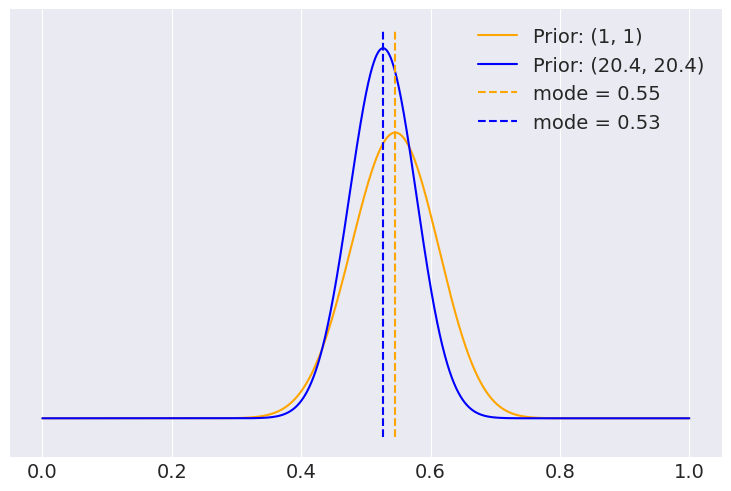

In [30]:
beta_params = [(1, 1), (20.4, 20.4)]
x = np.linspace(0, 1, 2000)

N = 55
y = 30

m = []
colors = ('orange', 'blue')
for i, (alpha_prior, beta_prior) in enumerate(beta_params):
  posterior = pz.Beta(alpha_prior + y, beta_prior + N - y).pdf(x)
  plt.plot(x, posterior, color = colors[i], label = f'Prior: ({alpha_prior}, {beta_prior})')
  m.append(pz.Beta(alpha_prior + y, beta_prior + N - y).mode())


plt.yticks([])


ylim = plt.gca().get_ylim()
for i in range(len(m)):
  plt.plot([m[i], m[i]], ylim, color = colors[i], linestyle = 'dashed', label = f'mode = {np.round(m[i], 2)}')

plt.legend(loc = 'upper right')


plt.savefig("posterior2.png", bbox_inches='tight')
files.download("posterior2.png")

# Watermark

Please include this watermark so I can see what versions you are working with

In [ ]:
%%capture
!pip install watermark

In [ ]:
%load_ext watermark
%watermark -v -iv -w